In [134]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import gridspec
from scipy.optimize import curve_fit

%matplotlib inline


In [135]:
class initialCleanUp:
    """ Cleaning up of the raw oscilliscope data. """
    def __init__(self, dataset):
        self.dataset = dataset
    
    def removeColsAndRows(self, dataStartRow):

        """
        Remove columns and rows that aren't useful for
        plotting.
        DataStartRow is the row where the data starts in the file.
        """

        self.dataset.drop(self.dataset.columns[[2]], axis=1, inplace=True)


        self.dataset = self.dataset.drop(labels=range(0, dataStartRow), axis=0)

        return self.dataset
    
class findPeaks:
    """ Finding the peaks of a panda dataset. """
    def __init__(self, data):
        self.data = data
    
    def max(self):
        """ 
        Find the maximum values and all of its corresponding row values.
        The twenty is so the values are off the exact peak by a little,
        it was suggested this would be a good step.
        """
        max_index = self.data.y.argmax()
        y_position_max = self.data.iloc[max_index+40, 0:2]
        return y_position_max
    
    def min(self):
        """ 
        Find the minimum values and all of its corresponding row values.
        The twenty is so the values are off the exact peak by a little,
        it was suggested this would be a good step.
        """
        min_index = self.data.y.argmin()
        y_position_min = self.data.iloc[min_index-40, 0:2]
        return y_position_min
        
        

Text(0.5, 1.0, 'This is a plot of the raw data from the oscilliscope. ')

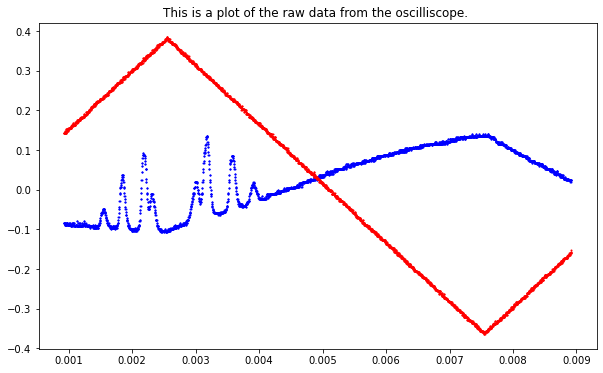

In [136]:
# Get the raw data from the oscilloscopes output
raw4peakData = pd.read_csv('/Users/starman/Desktop/PycharmProjects-fall-2021/'
                      'phy445-Lab1-FINAL/Data/nonlinearDoppler-part1/'
                      'A0005CH1.CSV')

rawTriangleWaveData = pd.read_csv('/Users/starman/Desktop/PycharmProjects-fall-2021/'
                      'phy445-Lab1-FINAL/Data/nonlinearDoppler-part1/'
                      'A0005CH2.CSV')

rawCopied4PeakData = raw4peakData.copy()
rawCopiedTriangleWaveData = rawTriangleWaveData.copy()


dataStart = 17

# Clear the unnessecary rows and columns from the raw data
cleanedUp4PeakData = initialCleanUp(rawCopied4PeakData).removeColsAndRows(dataStart)
cleanedUp4PeakData.columns = ['x', 'y']
cleanedUp4PeakData = cleanedUp4PeakData.astype(float)


cleanedUpTriangleWaveData = initialCleanUp(rawCopiedTriangleWaveData).removeColsAndRows(dataStart)
cleanedUpTriangleWaveData.columns = ['x', 'y']
cleanedUpTriangleWaveData = cleanedUpTriangleWaveData.astype(float)

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])


ax1.scatter(cleanedUp4PeakData['x'], cleanedUp4PeakData['y'], c='blue', s=1)
ax1.scatter(cleanedUpTriangleWaveData['x'], cleanedUpTriangleWaveData['y'], c='red', s=1)


plt.title("This is a plot of the raw data from the oscilliscope. ")



Text(0.5, 1.0, 'The purple dots are the peaks, slightly off intentionally.')

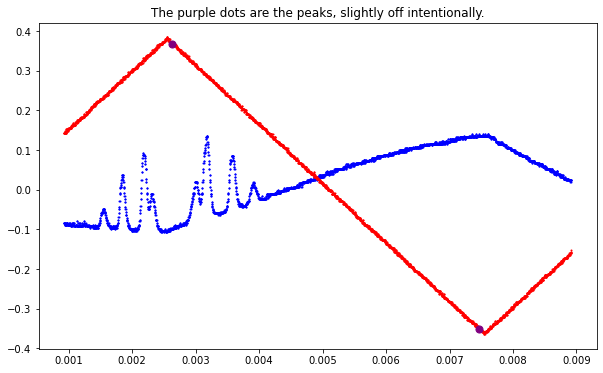

In [137]:
# Finding the min and max values of the triangle wave
y_min_position = findPeaks(cleanedUpTriangleWaveData).min()
y_max_position = findPeaks(cleanedUpTriangleWaveData).max()

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(cleanedUp4PeakData['x'], cleanedUp4PeakData['y'], c='blue', s=1)
ax1.scatter(cleanedUpTriangleWaveData['x'], cleanedUpTriangleWaveData['y'], c='red', s=1)
ax1.scatter(y_min_position[0], y_min_position[1], s=50, c='purple')
ax1.scatter(y_max_position[0], y_max_position[1], s=50, c='purple')

plt.title('The purple dots are the peaks, slightly off intentionally.' )


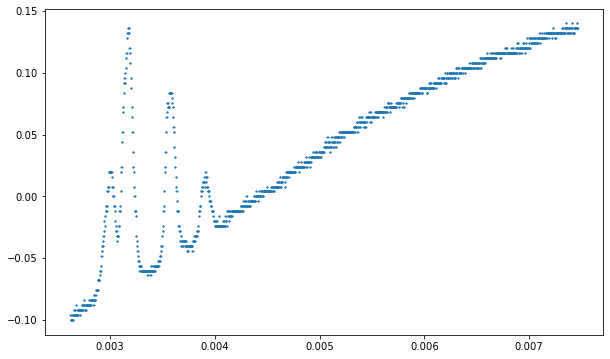

In [138]:
# Chopping off the ends of the data that are outside the above purple points.

chopped4PeakData = cleanedUp4PeakData.loc[(cleanedUp4PeakData.x >= y_max_position[0]) &
                                          (cleanedUp4PeakData.x <= y_min_position[0])]


# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(chopped4PeakData['x'], chopped4PeakData['y'], s=1)



Text(0.5, 1.0, 'Fitting the chopped data with an exponential and a 4 gaussian function together.')

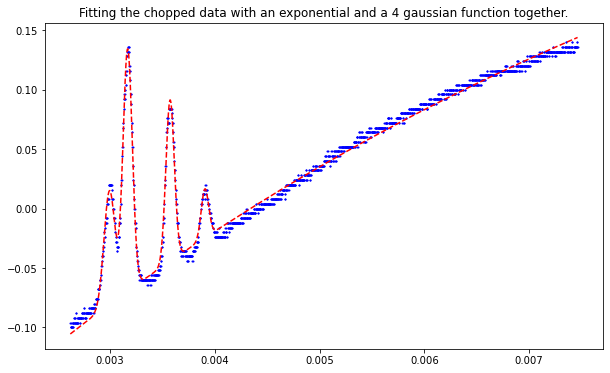

In [142]:
#Fitting the curve.

def exponentialAndGaussian(x, a,k,b, amp1,cen1,sigma1, amp2,cen2,sigma2, amp3,cen3,sigma3, amp4,cen4,sigma4):
    return ((a*np.exp(k*x) + b) +
            (amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2.0))) +
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2.0))) +
            amp3*(1/(sigma3*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen3)/sigma3)**2.0))) +
            amp4*(1/(sigma4*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen4)/sigma4)**2.0)))))

# Initial guess of the parameters of the fit
guess = [-1,3,-0.1, 0.01,0.0030,1e-5, 0.01,0.0032,1e-5, 0.01,0.0035,1e-5, 0.01,0.00390,1e-5]
parameters_exponential, pcov_exponential = curve_fit(f = exponentialAndGaussian, 
                                                     xdata = chopped4PeakData['x'], 
                                                     ydata = chopped4PeakData['y'], 
                                                     p0=guess)


a, k, b = parameters_exponential[0], parameters_exponential[1], parameters_exponential[2]

ampl1, cent1, sigm1 = parameters_exponential[3], parameters_exponential[4], parameters_exponential[5]
ampl2, cent2, sigm2 = parameters_exponential[6], parameters_exponential[7], parameters_exponential[8]
ampl3, cent3, sigm3 = parameters_exponential[9], parameters_exponential[10], parameters_exponential[11]
ampl4, cent4, sigm4 = parameters_exponential[12], parameters_exponential[13], parameters_exponential[14]


curveFitValues = [exponentialAndGaussian(i,a,k,b, ampl1,cent1,sigm1, ampl2,cent2,sigm2, ampl3,cent3,sigm3,
                              ampl4,cent4,sigm4) for i in chopped4PeakData['x']]

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(chopped4PeakData['x'], chopped4PeakData['y'], s=1, c='blue')
ax1.plot(chopped4PeakData['x'], curveFitValues, '--', c='red')


plt.title("Fitting the choppedd data with an exponential and a 4 gaussian function together.")

In [140]:
# Calculate the chi-square of the fit vs. data


In [141]:
# Estimating the error using the technique learned in lab
#--> due to the fact of the thickness of the blue line.